In [63]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import make_interp_spline, BSpline

from typing import List

In [64]:
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [89]:
files_data = dict()
data_path = './plot-data'
for i, file in enumerate(os.listdir(data_path)):
    with open(f'{data_path}/{file}') as json_file:
        data = json.load(json_file)
        y = np.array(list(map(lambda x: x[2], data)))
        x = np.array(list(range(len(parsed_data))))
        
        is_train = 'train' in file

        model = 'U-Net'
        atlas = 'Brainstem'
        if 'model3v2' in file:
            model = 'Atlas extension'
            if 'parotids' in file:
                atlas = 'Parotids'
            if 'all_maps' in file:
                atlas = 'All maps'
                
            model = f'{model} - {atlas}'
        if 'model3v1' in file:
            model = 'Extension'
                
        files_data[file] = y

In [93]:
sorted(list(files_data.keys()))

['run-20210417-183504_3d_unet_lowres_model3v2__cloud-PITUITARY-brainstem_reg_dsc_train-tag-dsc.json',
 'run-20210417-183504_3d_unet_lowres_model3v2__cloud-PITUITARY-brainstem_reg_dsc_valid-tag-dsc.json',
 'run-20210418-020905_3d_unet_lowres_model3v2__cloud-PITUITARY-parotids_reg_dsc_train-tag-dsc.json',
 'run-20210418-020905_3d_unet_lowres_model3v2__cloud-PITUITARY-parotids_reg_dsc_valid-tag-dsc.json',
 'run-20210418-100654_3d_unet_lowres_model3v2__cloud-PITUITARY-all_maps_reg_dsc_train-tag-dsc.json',
 'run-20210418-100654_3d_unet_lowres_model3v2__cloud-PITUITARY-all_maps_reg_dsc_valid-tag-dsc.json',
 'run-20210425-143946_3d_unet_lowres_model3v1__cloud-PITUITARY_dsc_train-tag-dsc.json',
 'run-20210425-143946_3d_unet_lowres_model3v1__cloud-PITUITARY_dsc_valid-tag-dsc.json',
 'run-20210426-171235_3d_unet_lowres_model2__cloud-PITUITARY_dsc_train-tag-dsc.json',
 'run-20210426-171235_3d_unet_lowres_model2__cloud-PITUITARY_dsc_valid-tag-dsc.json']

In [134]:
alpha = 0.2
dpi = 100
smoothing = 0.8

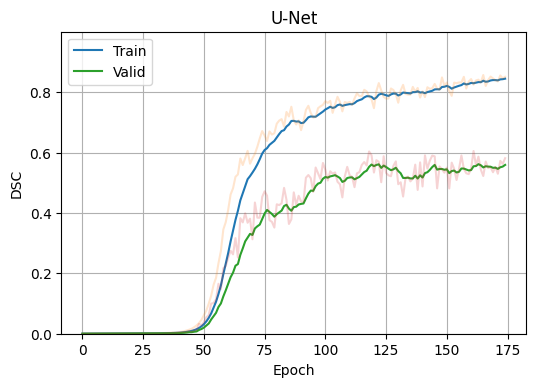

In [167]:
fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0, 1, 0.2))
ax.set_ylim([0, 1])

y = files_data['run-20210426-171235_3d_unet_lowres_model2__cloud-PITUITARY_dsc_train-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Train")
plt.plot(y, alpha=alpha)

y = files_data['run-20210426-171235_3d_unet_lowres_model2__cloud-PITUITARY_dsc_valid-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Valid")
plt.plot(y, alpha=alpha)

plt.title('U-Net')
plt.grid()
plt.legend()
plt.ylabel('DSC')
plt.xlabel('Epoch')
plt.show()

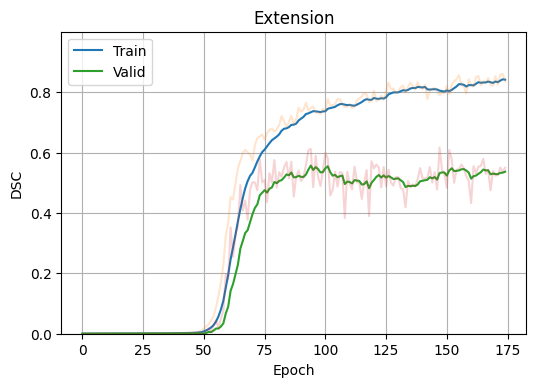

In [168]:
fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0, 1, 0.2))
ax.set_ylim([0, 1])

y = files_data['run-20210425-143946_3d_unet_lowres_model3v1__cloud-PITUITARY_dsc_train-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Train")
plt.plot(y, alpha=alpha)

y = files_data['run-20210425-143946_3d_unet_lowres_model3v1__cloud-PITUITARY_dsc_valid-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Valid")
plt.plot(y, alpha=alpha)

plt.title('Extension')
plt.grid()
plt.legend()
plt.ylabel('DSC')
plt.xlabel('Epoch')
plt.show()

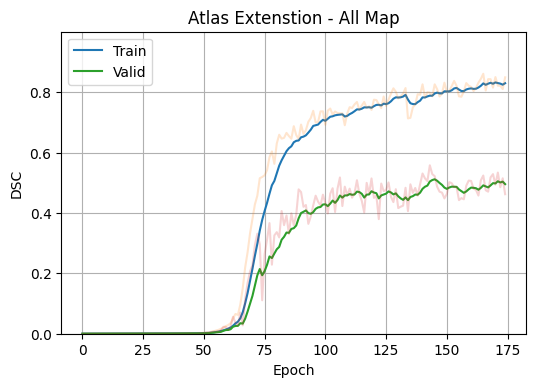

In [169]:
fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0, 1, 0.2))
ax.set_ylim([0, 1])

y = files_data['run-20210418-100654_3d_unet_lowres_model3v2__cloud-PITUITARY-all_maps_reg_dsc_train-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Train")
plt.plot(y, alpha=alpha)

y = files_data['run-20210418-100654_3d_unet_lowres_model3v2__cloud-PITUITARY-all_maps_reg_dsc_valid-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Valid")
plt.plot(y, alpha=alpha)

plt.title('Atlas Extenstion - All Map')
plt.grid()
plt.legend()
plt.ylabel('DSC')
plt.xlabel('Epoch')
plt.show()

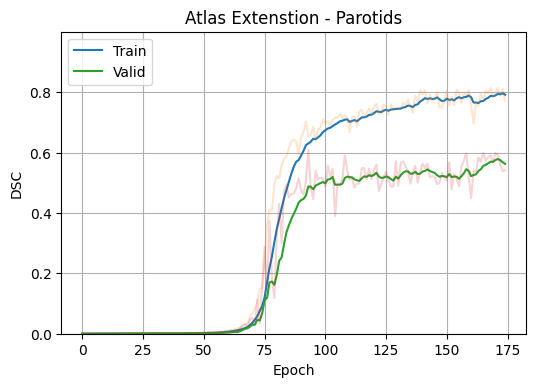

In [173]:
fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0, 1, 0.2))
ax.set_ylim([0, 1])

y = files_data['run-20210418-020905_3d_unet_lowres_model3v2__cloud-PITUITARY-parotids_reg_dsc_train-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Train")
plt.plot(y, alpha=alpha)

y = files_data['run-20210418-020905_3d_unet_lowres_model3v2__cloud-PITUITARY-parotids_reg_dsc_valid-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Valid")
plt.plot(y, alpha=alpha)

plt.title('Atlas Extenstion - Parotids')
plt.grid()
plt.legend(loc='upper left')
plt.ylabel('DSC')
plt.xlabel('Epoch')
plt.show()

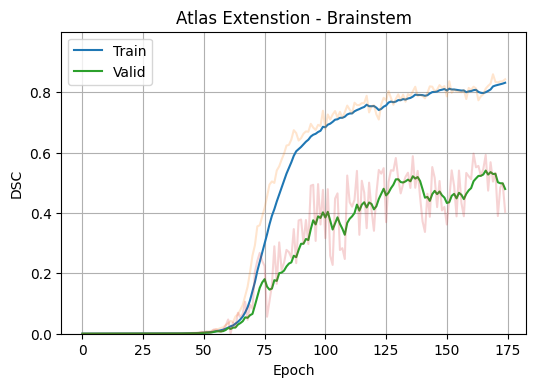

In [171]:
fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0, 1, 0.2))
ax.set_ylim([0, 1])

y = files_data['run-20210417-183504_3d_unet_lowres_model3v2__cloud-PITUITARY-brainstem_reg_dsc_train-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Train")
plt.plot(y, alpha=alpha)

y = files_data['run-20210417-183504_3d_unet_lowres_model3v2__cloud-PITUITARY-brainstem_reg_dsc_valid-tag-dsc.json']
plt.plot(smooth(y, smoothing), label="Valid")
plt.plot(y, alpha=alpha)

plt.title('Atlas Extenstion - Brainstem')
plt.grid()
plt.legend()
plt.ylabel('DSC')
plt.xlabel('Epoch')
plt.show()